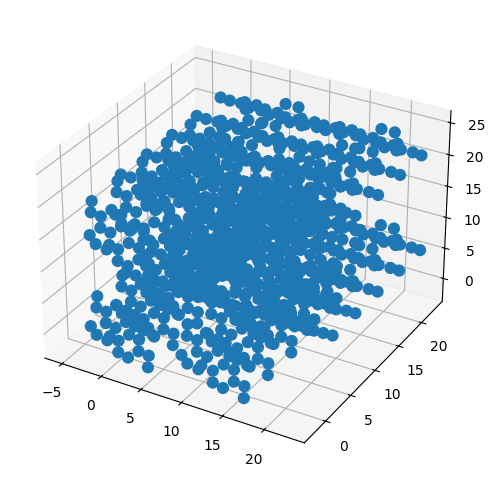

In [32]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations

# **********************************

base_path = r'C:\Users\Builder\Desktop\temp\ustozga3'
input_file = r'RELVUC_times_2x5x2_new.xyz'
output_file = r'RELVUC_times_2x5x2_new.txt'


# **********************************

def compute_normals(df):
    """Calculate normal vectors for each cluster using PCA/SVD."""
    points = df[['x', 'y', 'z']].values
    centroid = np.mean(points, axis=0)
    centered = points - centroid
    _, _, Vh = np.linalg.svd(centered, full_matrices=False)
    normal = Vh[2, :]
    # Ensure consistent normal orientation (optional)
    df[['vecx', 'vecy', 'vecz']] = normal * np.sign(normal[2])
    df[['comx', 'comy', 'comz']] = centroid
    return df  # Flip if z-component is negative

def calculate_angles(normals):
    """Calculate angles between all pairs of normal vectors in degrees."""
    # Normalize vectors to ensure numerical stability
    normals = normals / np.linalg.norm(normals, axis=1)[:, np.newaxis]
    
    # Vectorized computation of all pairwise dot products
    dot_products = np.dot(normals, normals.T)
    
    # Clip values to avoid numerical errors in arccos
    dot_products = np.clip(dot_products, -1.0, 1.0)
    
    # Calculate angles in radians then convert to degrees
    angles = np.degrees(np.arccos(dot_products))
    
    
    # Extract unique pairwise combinations (upper triangle without diagonal)
    i, j = np.triu_indices_from(angles, k=1)
 
    return angles[i, j]

# Load and process data
columns = ['x', 'y', 'z', 'clusterid']
df = pd.read_csv(os.path.join(base_path, input_file), sep=r'\s+', skiprows=2, names=columns)

# Calculate normals for each cluster
normals = df.groupby("clusterid")[['x', 'y', 'z']].apply(compute_normals).reset_index()
# normals_array = np.array(normals.tolist())


# Plot histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normals.x, normals.y, normals.z, s=60, alpha=1)

# ax.legend()
plt.show()